```Hi Alex, Jupyter Markdown and formats are similar to but different from R Markdown -- you'll quickly get the hang of it by viewing the "Help" docs from the above menu.  

Mostly, there's two different types of 'cells' -- code and markdown.   And you select what type of cell you want -- note, keyboard shortcuts are your very good friend for Jupyter (as well as all of life).

What I did was to paste your entire *.rmd file here, and then went through and began to slice it up into different cells. I isolated the code, or much of it, into 'markdown' cells, and the rest into 'code' cells.  Now, what remains is to go through each cell and try formatting the markdown (much of that is already working, since md is md) and then try running the R (this has some hiccups due to dependencies, which just need to be loaded ).  You can delete this and all my comments and let me know if you have any blockers.

Note that there's a few custom apps for rmd to ipynb conversion available on github, however, since a 'notebook' file is really just a bunch of formatting (plus separate R code) my thought its its faster and easier to just manually make the conversion and then going cell by cell to make sure everything works.  Eventually worth trying out perhaps an rmd to ipynb converter if this is a common or bulk-runnable task (i.e for 50 rmd notebooks). 

d

```

---
title: "The Rise of the New Kind of Cabbie: A Comparison of Uber and Taxi Drivers"
output: html_notebook
author: Alex Albright
date: 7-27-17
---
# Comparing Uber and Taxi Drivers 
This notebook generates updated visuals for [my blog post "The Rise of the New Kind of Cabbie: A Comparison of Uber and Taxi Drivers."](https://thelittledataset.com/2015/03/30/the-rise-of-the-new-kind-of-cabbie-a-comparison-of-uber-and-taxi-drivers/) 

# Motivation
It is undoubtedly obvious that compared to traditional cab service drivers, Uber drivers are *younger, whiter, more female, and more part-time.* Though I have continuously noted these distinctions since growing accustomed to Uber over recent years, I did not think that there was data for illustrating these distinctions quantitatively. However, I recently came across the paper [â€œAn Analysis of the Labor Market for Uberâ€™s Driver-Partners in the United States,â€ written by (Economists!) Jonathan Hall and Alan Krueger.](https://irs.princeton.edu/sites/irs/files/An%20Analysis%20of%20the%20Labor%20Market%20for%20Uber%E2%80%99s%20Driver-Partners%20in%20the%20United%20States%20587.pdf) The paper supplies tables that summarize characteristics of both Uber drivers and their conventional taxi driver/chauffeur counterparts. This allows for an exercise in visually depicting the differences between the two opposing sets of driversâ€”allowing us to then accurately define the characteristics of a new kind of cabbie.  

## 1. Age range 

## Load libraries

In [8]:
# Install required packages
# Alex: Note that you'll need for now to add this extra step of installing packages.  We can list the required packages and make a separate "Dependecy" pack  Currently using the "NLP" dependency pack, which includes the R kernel but doesn't have all of these libraries.
# Note that this might take a bit of experimenting. 

install.packages('ggthemes', dependencies = FALSE)
install.packages('reshape', dependencies = FALSE)
install.packages('gridExtra', dependencies = FALSE)

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [9]:
# Load libraries
library(ggplot2);library(ggthemes);library(plyr);library(reshape);library(grid);library(scales);library(RColorBrewer);library(gridExtra)


Attaching package: 'reshape'

The following objects are masked from 'package:plyr':

    rename, round_any



### Create my custom theme:

In [10]:
my_theme <- function() {

  # Define colors for the chart
  palette <- brewer.pal("Greys", n=9)
  color.background = palette[2]
  color.grid.major = palette[4]
  color.panel = palette[3]
  color.axis.text = palette[9]
  color.axis.title = palette[9]
  color.title = palette[9]

  # Create basic construction of chart
  theme_bw(base_size=9, base_family="Palatino") + 

  # Set the entire chart region to a light gray color
  theme(panel.background=element_rect(fill=color.panel, color=color.background)) +
  theme(plot.background=element_rect(fill=color.background, color=color.background)) +
  theme(panel.border=element_rect(color=color.background)) +

  # Format grid
  theme(panel.grid.major=element_line(color=color.grid.major,size=.25)) +
  theme(panel.grid.minor=element_blank()) +
  theme(axis.ticks=element_blank()) +

  # Format legend
  theme(legend.position="right") +
  theme(legend.background = element_rect(fill=color.panel)) +
  theme(legend.text = element_text(size=8,color=color.axis.title)) +
  theme(legend.title=element_blank())+

  # Format title and axes labels these and tick marks
  theme(plot.title=element_text(color=color.title, size=15, vjust=0.5, hjust=0, face="bold")) +
  theme(axis.text.x=element_text(size=8,color=color.axis.text)) +
  theme(axis.text.y=element_text(size=8,color=color.axis.text)) +
  theme(axis.title.x=element_text(size=0,color=color.axis.title, vjust=-1, face="italic")) +
  theme(axis.title.y=element_text(size=0,color=color.axis.title, vjust=1.8, face="italic")) +

  # Plot margins
  theme(plot.margin = unit(c(0, 0, 0, 0), "cm"))
}

Let's load the data for ages and plot it:

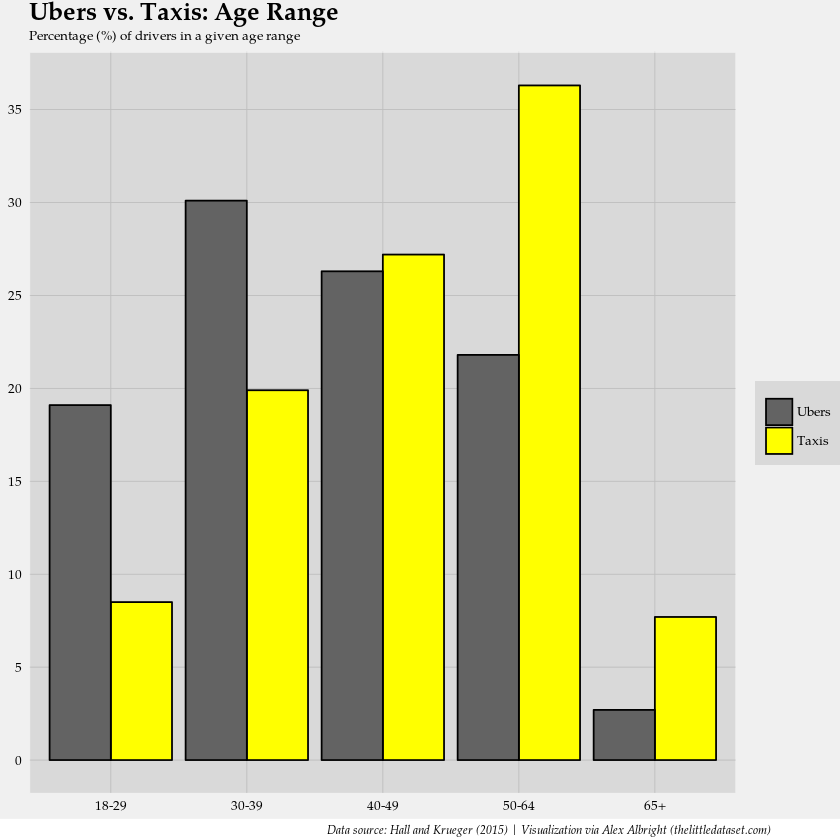

In [11]:

age <- read.csv('raw_data/age.csv')

newage<-melt(age, id=c("Attribute"))

#set colors for uber and taxi driver bars
pal2 <- c("#636363", "#ffff00")

#plot graph
age<-ggplot(data=newage, aes(x=Attribute, y=value, fill=variable))+ 
	geom_bar(stat="identity", position=position_dodge(), colour="black")+
	scale_fill_manual(values = pal2) +
	theme(legend.key = element_rect(colour = "black"))+
	my_theme()+
	guides(fill = guide_legend(override.aes = list(colour = NULL)))+
	scale_y_continuous(breaks=seq(0,40,5))+
	ggtitle("Ubers vs. Taxis: Age Range", subtitle="Percentage (%) of drivers in a given age range") 

#add source and credit 
grid.arrange(age, ncol=1, nrow=1, bottom=textGrob("Data source: Hall and Krueger (2015) | Visualization via Alex Albright (thelittledataset.com)", hjust=.21, gp=gpar(fontsize=7, font=3, fontfamily="Palatino")))


In [ ]:
Save to pdf
```{r}

In [ ]:
#save to pdf
pdf("age.pdf", width = 6, height = 4) # Open a new pdf file
grid.arrange(age, ncol=1, nrow=1, bottom=textGrob("Data source: Hall and Krueger (2015) | Visualization via Alex Albright (thelittledataset.com)", hjust=.21, gp=gpar(fontsize=7, font=3, fontfamily="Palatino")))
dev.off()
```
## 2. Hours worked
Load data and plot:

In [ ]:
```{r, message=FALSE, warning=FALSE}
h <- read.csv('raw_data/hours.csv')

hour<-melt(h, id=c("Attribute"))

#set colors for uber and driver driver bars
pal2 <- c("#636363", "#ffff00")

#define graph
hours<-ggplot(data=hour, aes(x=Attribute, y=value, fill=variable))+ 
	geom_bar(stat="identity", position=position_dodge(), colour="black")+
	scale_fill_manual(values = pal2, guide_legend(colour="black")) +
	theme(legend.key = element_rect(colour = "black"))+
	my_theme()+
	guides(fill = guide_legend(override.aes = list(colour = NULL)))+
  ggtitle("Ubers vs. Taxis: Hours Worked", subtitle = "Percentage (%) of drivers working a given range of hours/week")+
  scale_x_discrete(labels=c("1-15", "16-34", "35-49", "50+"))

#add source and credit    
grid.arrange(hours, ncol=1, nrow=1, bottom=textGrob("Data source: Hall and Krueger (2015) | Visualization via Alex Albright (thelittledataset.com)", hjust=.21, gp=gpar(fontsize=7, font=3, fontfamily="Palatino")))
```

In [ ]:
Save to pdf

In [ ]:
```{r}
#save to pdf
pdf("hours.pdf", width = 6, height = 4) # Open a new pdf file
grid.arrange(hours, ncol=1, nrow=1, bottom=textGrob("Data source: Hall and Krueger (2015) | Visualization via Alex Albright (thelittledataset.com)", hjust=.21, gp=gpar(fontsize=7, font=3, fontfamily="Palatino")))
dev.off()
```

In [ ]:
## 3. Education level
Load data and plot:

In [ ]:
```{r}
ed <- read.csv('raw_data/education.csv')
newed<-melt(ed, id=c("Attribute"))

#set colors for uber and taxi driver bars
pal2 <- c("#636363", "#ffff00")

#plot graph
education<-ggplot(data=newed, aes(x=Attribute, y=value, fill=variable))+ 
	geom_bar(stat="identity", position=position_dodge(), colour="black")+
	scale_fill_manual(values = pal2, guide_legend(colour="black")) +
	theme(legend.key = element_rect(colour = "black"))+
	my_theme()+ 
  theme(axis.text.x=element_text(size=6.5)) +
	guides(fill = guide_legend(override.aes = list(colour = NULL)))+
  scale_x_discrete(labels=c("Less than High School", "High School", "Some College/Associate's", "College Degree","Postgraduate Degree"))+
	ggtitle("Ubers vs. Taxis: Education Level", subtitle="Percentage (%) of drivers by highest level of education") 

#add source and credit    
grid.arrange(education, ncol=1, nrow=1, bottom=textGrob("Data source: Hall and Krueger (2015) | Visualization via Alex Albright (thelittledataset.com)", hjust=.21, gp=gpar(fontsize=7, font=3, fontfamily="Palatino")))
```
Save to pdf

In [ ]:
```{r}
#save to pdf
pdf("educ.pdf", width = 6, height = 4) # Open a new pdf file
grid.arrange(education, ncol=1, nrow=1, bottom=textGrob("Data source: Hall and Krueger (2015) | Visualization via Alex Albright (thelittledataset.com)", hjust=.21, gp=gpar(fontsize=7, font=3, fontfamily="Palatino")))
dev.off()
```

In [ ]:
## 4. Earnings by city
Load data and plot:

In [ ]:
```{r}
#load data
ea <- read.csv('raw_data/earning.csv')

earn<-melt(ea, id=c("Attribute"))

#set colors for uber and taxi driver bars
pal2 <- c("#636363", "#ffff00")

#plot graph
ear<-ggplot(data=earn, aes(x=Attribute, y=value, fill=variable))+ 
	geom_bar(stat="identity", position=position_dodge(), colour="black")+
	scale_fill_manual(values = pal2, guide_legend(colour="black")) +
	theme(legend.key = element_rect(colour = "black"))+
	my_theme()+
	guides(fill = guide_legend(override.aes = list(colour = NULL)))+
	ggtitle("Ubers vs. Taxis: Earnings by City", subtitle="Median earnings ($) per hour by city") 

#add source and credit    
grid.arrange(ear, ncol=1, nrow=1, bottom=textGrob("Data source: Hall and Krueger (2015) | Visualization via Alex Albright (thelittledataset.com)", hjust=.21, gp=gpar(fontsize=7, font=3, fontfamily="Palatino")))

In [ ]:
```
Save to pdf

In [ ]:
```{r}
#save to pdf
pdf("earning_by_city.pdf", width = 6, height = 4) # Open a new pdf file
grid.arrange(ear, ncol=1, nrow=1, bottom=textGrob("Data source: Hall and Krueger (2015) | Visualization via Alex Albright (thelittledataset.com)", hjust=.21, gp=gpar(fontsize=7, font=3, fontfamily="Palatino")))
dev.off()
```

In [ ]:
## 5. Hours worked by city
Load data and plot:

In [ ]:
```{r}
ed <- read.csv('raw_data/citiesuberx.csv')

cit<-melt(ed, id=c("City"))

#plot graph
city<-ggplot(data = cit, aes(x = City, y=value, fill = variable)) + 
	geom_bar(stat="identity", colour="black")+ coord_flip()+ 
	theme(legend.key = element_rect(colour = "black"))+
	my_theme()+
	guides(fill = guide_legend(override.aes = list(colour = NULL)))+
	scale_fill_brewer(palette="GnBu", name ="Hours/Week", breaks=c("X1.to.15", "X16.to.34","X35.to.49","X50.or.more"), labels=c("1-15", "16-34","35-49","50+"))+
	ggtitle("Uber: Hours Worked by City", subtitle="Percentage (%) of drivers working a given range of hours/week") 

#add source and credit    
grid.arrange(city, ncol=1, nrow=1, bottom=textGrob("Data source: Hall and Krueger (2015) | Visualization via Alex Albright (thelittledataset.com)", hjust=.21, gp=gpar(fontsize=7, font=3, fontfamily="Palatino")))
```
Save to pdf

In [ ]:
```{r}
#save to pdf
pdf("city.pdf", width = 6, height = 4) # Open a new pdf file
grid.arrange(city, ncol=1, nrow=1, bottom=textGrob("Data source: Hall and Krueger (2015) | Visualization via Alex Albright (thelittledataset.com)", hjust=.21, gp=gpar(fontsize=7, font=3, fontfamily="Palatino")))
dev.off()
```
## 6. Race
Load data and plot:
```{r}
race <- read.csv('raw_data/race.csv')

newrace<-melt(race, id=c("Attribute"))

#set colors for uber and taxi driver bars
pal2 <- c("#636363", "#ffff00")

#plot graph
race<-ggplot(data=newrace, aes(x=Attribute, y=value, fill=variable))+ 
	geom_bar(stat="identity", position=position_dodge(), colour="black")+
	scale_fill_manual(values = pal2, guide_legend(colour="black")) +
	theme(legend.key = element_rect(colour = "black"))+
	my_theme()+
  theme(axis.text.x=element_text(size=6.5)) +
	guides(fill = guide_legend(override.aes = list(colour = NULL)))+
	ggtitle("Ubers vs. Taxis: Race", subtitle="Percentage (%) of drivers of a given race")

#add source and credit    
grid.arrange(race, ncol=1, nrow=1, bottom=textGrob("Data source: Hall and Krueger (2015) | Visualization via Alex Albright (thelittledataset.com)", hjust=.21, gp=gpar(fontsize=7, font=3, fontfamily="Palatino")))
```
Save to pdf

In [ ]:
```{r}
#save to pdf
pdf("race.pdf", width = 6, height = 4) # Open a new pdf file
grid.arrange(race, ncol=1, nrow=1, bottom=textGrob("Data source: Hall and Krueger (2015) | Visualization via Alex Albright (thelittledataset.com)", hjust=.21, gp=gpar(fontsize=7, font=3, fontfamily="Palatino")))
dev.off()
```
## 7. Gender
Load data and plot:
```{r, message=FALSE, warning=FALSE}
#load numbers--since it's only three percentages it's not worth loading in the gender.csv file 
DF <- data.frame(type = c("Ubers","Taxis","NYC Taxis"), per = c(13.8,8,1)) 
 
#place percentages in the middle of the bars
 DF <- ddply(DF, .(type), transform, pos = cumsum(per) - (0.5 * per))
 
#plot graph 
fem<-ggplot(DF, aes(x = type, y = per)) + 
	my_theme()+
	geom_bar(stat = "identity", fill = "firebrick", colour="black") + 
	labs(title= "Ubers vs. Taxis: Gender \nPercentage of female drivers", x="", y="")+
	ggtitle("Ubers vs. Taxis: Gender", subtitle="Percentage of female drivers") +
  theme(plot.margin = unit(c(0, 1, 0, 0), "cm"))+
  geom_text(aes(label = c("1%", "8%","13.8%"), y = pos), size = 5, family="Palatino", face="bold")

#add source and credit    
grid.arrange(fem, ncol=1, nrow=1, bottom=textGrob("Data source: Hall and Krueger (2015) | Visualization via Alex Albright (thelittledataset.com)", hjust=.21, gp=gpar(fontsize=7, font=3, fontfamily="Palatino")))
```
Save to pdf

In [ ]:
```{r}
#save to pdf
pdf("gender.pdf", width = 6, height = 4) # Open a new pdf file
grid.arrange(fem, ncol=1, nrow=1, bottom=textGrob("Data source: Hall and Krueger (2015) | Visualization via Alex Albright (thelittledataset.com)", hjust=.21, gp=gpar(fontsize=7, font=3, fontfamily="Palatino")))
dev.off()
```
We have now finished plotting/saving all the graphs in the article.

# The End